# EDA Project Dmitrii Shumakher

# King County Housing Market — Exploratory Data Analysis

## Project Objective

### Data Loading

In [44]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

We begin by loading the dataset and inspecting its structure, size, and basic characteristics.

### Dataset Overview


In [45]:
df = pd.read_csv("data/king_county_full.csv")

df.shape

(21597, 21)

The dataset contains **21,597 observations** and **21 features**.

Each row represents a house sale transaction.

In [46]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


### Data Types & Missing Values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

- Most variables are numerical (float64 / int64)
- The `date` column is stored as object
- Some features contain missing values:
    - waterfront
    - view
    - sqft_basement
    - yr_renovated

These will be handled in the cleaning stage.

### Summary Statistics

In [48]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


Key observations:

- Average house price ≈ $540K
- Median price = $450K
- Maximum price = $7.7M
- Strong difference between median and maximum suggests right-skewness

Living area ranges from 370 to 13,540 sqft, indicating significant variability in property size.

## Target Variable Analysis — Price

### Price Percentiles

In [50]:
df['price'].describe(percentiles=[0.9, 0.95, 0.99])

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
50%      450000.000
90%      887000.000
95%     1160000.000
99%     1970000.000
max     7700000.000
Name: price, dtype: float64

- 90% of houses cost below $887K
- 95% below $1.16M
- 99% below $1.97M

We define the luxury segment as properties priced above the 95th percentile ($1.16M).

### Price Distribution Overview

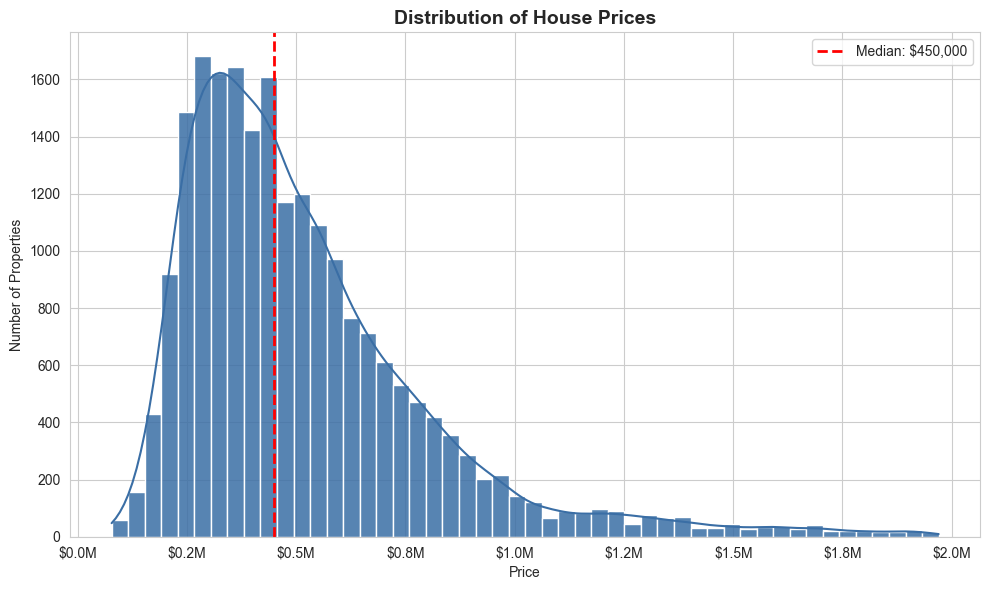

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

upper_limit = df['price'].quantile(0.99)

sns.histplot(
    df[df['price'] <= upper_limit]['price'],
    bins=50,
    kde=True,
    color="#3A6EA5",
    edgecolor="white",
    alpha=0.85
)

median_price = df['price'].median()
plt.axvline(median_price, color="red", linestyle="--", linewidth=2, label=f"Median: ${median_price:,.0f}")

plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M')
)

plt.title("Distribution of House Prices", fontsize=14, fontweight='bold')
plt.xlabel("Price")
plt.ylabel("Number of Properties")
plt.legend()

plt.tight_layout()
plt.show()

The distribution of house prices is strongly right-skewed, indicating that most properties are concentrated in the lower-to-mid price range, while a smaller number of high-end homes extend the upper tail of the distribution.

The majority of listings fall roughly between $200K and $800K.  
The red dashed line represents the median price (~$450K), meaning that 50% of properties are priced below this level.

The long upper tail reflects the presence of luxury properties, which significantly increase the overall price dispersion.

## Missing Value Handling

In [51]:
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [52]:
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['sqft_basement'] = df['sqft_basement'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [53]:
df.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
dtype: int64

Missing values in:

- waterfront
- view
- sqft_basement
- yr_renovated

were replaced with 0, assuming absence of feature (e.g., no waterfront, no renovation, no basement).

## Luxury Market Segment Analysis

Based on the initial price distribution, we propose the following hypotheses:

1. Luxury properties have significantly larger living areas compared to the overall market.

2. Higher construction grade increases the likelihood of a property belonging to the luxury segment.

3. Luxury homes are geographically concentrated in specific zipcodes.

In [54]:
luxury = df[df['price'] >= 1160000]
luxury.shape

(1084, 21)

Luxury homes are defined as properties priced above $1.16M (95th percentile).

In [55]:
luxury_percentage = len(luxury) / len(df) * 100
luxury_percentage

5.019215631800713

Luxury properties account for approximately **5% of total transactions**.

### Comparison: Overall Market vs Luxury Segment

In [56]:
df[['sqft_living','sqft_lot','grade','bathrooms']].mean()

sqft_living    2080.322
sqft_lot      15099.409
grade             7.658
bathrooms         2.116
dtype: float64

In [57]:
luxury[['sqft_living','sqft_lot','grade','bathrooms']].mean()

sqft_living    3953.325
sqft_lot      23376.058
grade             9.929
bathrooms         3.257
dtype: float64

Luxury homes demonstrate:

- ~90% larger living area (3953 vs 2080 sqft)
- Higher construction grade (9.9 vs 7.7)
- More bathrooms (3.26 vs 2.12)
- Larger lot sizes (23376 vs 15099 sqft)

### Waterfront Effect

Although our buyer persona prefers no waterfront, we examine whether waterfront access is structurally associated with luxury pricing.

In [113]:
overall_waterfront = df['waterfront'].mean()
luxury_waterfront = luxury['waterfront'].mean()

overall_waterfront, luxury_waterfront

(np.float64(0.006760198175672547), np.float64(0.08487084870848709))

Waterfront access is significantly more common in luxury properties.

While only ~0.7% of all homes have waterfront access, nearly ~8.5% of luxury homes do.

This indicates a strong association between waterfront access and luxury pricing.

In [114]:
luxury_waterfront / overall_waterfront

np.float64(12.554491229843805)

Luxury homes are approximately 12 times more likely to have waterfront access compared to the overall market.

### Geographic Concentration - Luxury

In [110]:
luxury_zip_price = (
    luxury
    .groupby('zipcode')
    .agg(
        listings=('price', 'count'),
        median_price=('price', 'median')
    )
    .sort_values('listings', ascending=False)
)

luxury_zip_price.head(10)

,listings,median_price
zipcode,,
98004,158,1695000.000
98040,115,1520000.000
98112,97,1570000.000
98006,88,1405000.000
98033,57,1490000.000
98105,49,1400000.000
98039,44,1950000.000
98199,43,1360000.000
98119,29,1430000.000


Luxury properties are not evenly distributed across the region.

High-end listings are strongly concentrated in a limited number of zip codes, particularly:

- 98004  
- 98040  
- 98112  

These areas represent established premium residential clusters, where both pricing and property characteristics consistently align with upper-tail market positioning.

This spatial concentration provides a structural reference point for evaluating Jacob’s filtered segment.

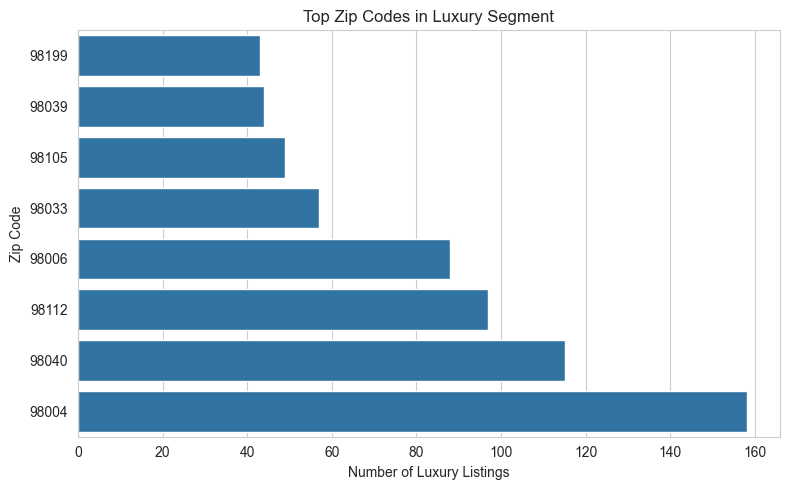

In [112]:
top_luxury = (
    luxury['zipcode']
    .value_counts()
    .head(8)
    .reset_index()
)

top_luxury.columns = ['zipcode', 'listings']
top_luxury['zipcode'] = top_luxury['zipcode'].astype(str)

top_luxury = top_luxury.sort_values('listings', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(data=top_luxury, x='listings', y='zipcode')

plt.title("Top Zip Codes in Luxury Segment")
plt.xlabel("Number of Luxury Listings")
plt.ylabel("Zip Code")

plt.tight_layout()
plt.show()

Luxury properties are highly concentrated within a limited number of zip codes.

The strongest premium clusters are observed in 98004, 98040, and 98112, 
confirming that high-end housing supply is spatially structured rather than evenly distributed.

These zones serve as the primary geographic benchmark when evaluating Jacob’s filtered segment.

### Luxury Segment Summary

Luxury properties represent approximately 5% of the market and are characterized by:

- Substantially larger living areas
- Higher construction grades
- Greater number of bathrooms
- Strong association with waterfront access
- Clear geographic clustering

## Buyer Fit Analysis — Jacob Phillips

### Business Context

This analysis is conducted from the perspective of a high-end buyer persona:

**Jacob Phillips**  
- Unlimited budget  
- 4+ bathrooms  
- Large lot (tennis court / pool potential)  
- Interest in golf & historic properties  
- Prefers no waterfront  

The goal is to understand how the market behaves for such premium preferences and what features structurally drive high-end pricing.

### Step 1: Basic Buyer Constraints

In [62]:
jacob_df = df[
    (df['bathrooms'] >= 4) &
    (df['waterfront'] == 0)
]

jacob_df.shape

(380, 21)

We first apply Jacob's primary structural requirements:

- At least 4 bathrooms  
- No waterfront access  

This initial filtering reduces the market from 21,597 properties to 380 properties.

This already represents a highly selective segment.

### Step 2: Large Lot Requirement

In [39]:
large_lot_threshold = df['sqft_lot'].quantile(0.75)

jacob_df = df[
    (df['bathrooms'] >= 4) &
    (df['waterfront'] == 0) &
    (df['sqft_lot'] >= large_lot_threshold)
]

jacob_df.shape

(215, 22)

To formalize the “large lot” preference, we define it as properties in the top 25% of lot size (≥ 75th percentile).

After applying this additional constraint, only 215 properties remain.

This represents less than 1% of the total market.

In [40]:
len(jacob_df) / len(df) * 100

0.9955086354586286

Only ~1% of all properties in the dataset simultaneously satisfy:

- 4+ bathrooms  
- No waterfront  
- Large lot (top quartile)

This confirms that Jacob’s requirements define a highly niche market segment.

### Price Profile of Matching Properties

In [41]:
jacob_df['price'].describe()

count       215.000
mean    1675800.265
std     1027450.627
min      290000.000
25%      997000.000
50%     1430000.000
75%     2100000.000
max     7700000.000
Name: price, dtype: float64

The median price of properties matching Jacob’s criteria is approximately $1.43M.

The 75th percentile exceeds $2.1M, indicating that most suitable properties naturally fall into the luxury bracket.

This suggests that Jacob’s structural requirements strongly push him into high-end pricing territory.

### Intersection with Luxury Segment

In [42]:
jacob_luxury = jacob_df[jacob_df['price'] >= 1160000]

len(jacob_luxury) / len(jacob_df) * 100

63.72093023255814

Approximately 63.7% of properties matching Jacob’s criteria belong to the luxury segment (≥ 95th percentile of price).

This indicates that the majority of homes fitting Jacob’s preferences are structurally aligned with luxury pricing.

### Geographic Distribution – Jacob Segment

#### Concentration of Matching Properties

In [96]:
jacob_zip_counts = (
    jacob_df['zipcode']
    .value_counts()
    .reset_index()
)

jacob_zip_counts.columns = ['zipcode', 'listings']
jacob_zip_counts.head(10)

,zipcode,listings
0,98006,28
1,98040,27
2,98004,24
3,98075,21
4,98112,17
5,98033,16
6,98074,15
7,98027,13
8,98199,13
9,98052,11


Properties satisfying Jacob’s structural requirements are concentrated in a limited number of zip codes.

The highest number of matching listings are observed in:

- 98006  
- 98040  
- 98075  
- 98004  

This indicates spatial clustering of large, high-end properties within specific premium submarkets.

#### Price Profile by Zip Code (Jacob Segment)

In [97]:
jacob_zip_price = (
    jacob_df
    .groupby('zipcode')
    .agg(
        listings=('price', 'count'),
        median_price=('price', 'median'),
        avg_lot=('sqft_lot', 'mean'),
        avg_sqft=('sqft_living', 'mean')
    )
    .sort_values('listings', ascending=False)
)

jacob_zip_price.head(10)

,listings,median_price,avg_lot,avg_sqft
zipcode,,,,
98006,28,1485000.000,20638.321,5351.250
98040,27,1680000.000,15918.889,4945.556
98004,24,2150000.000,14176.167,4987.292
98075,21,1070000.000,17007.381,4200.476
98112,17,2230000.000,11004.529,4727.176
98033,16,1680000.000,13246.625,4447.188
98074,15,1010000.000,31408.200,4313.000
98027,13,890000.000,100507.538,4878.462
98199,13,1230000.000,6842.615,4001.231


Beyond frequency, we analyze the pricing structure within each high-concentration zip code.

Some areas combine both:
- High availability of matching listings
- Elevated median pricing
- Larger average lot sizes

This helps distinguish between premium clusters and relatively more balanced luxury zones.

#### Price Efficiency Analysis

In [98]:
jacob_df['price_per_sqft'] = jacob_df['price'] / jacob_df['sqft_living']

jacob_zip_pps = (
    jacob_df
    .groupby('zipcode')
    .agg(
        median_price=('price', 'median'),
        avg_price_per_sqft=('price_per_sqft', 'mean'),
        listings=('price', 'count')
    )
    .sort_values('listings', ascending=False)
)

jacob_zip_pps.head(10)

,median_price,avg_price_per_sqft,listings
zipcode,,,
98006,1485000.000,323.944,28
98040,1680000.000,356.161,27
98004,2150000.000,453.849,24
98075,1070000.000,261.203,21
98112,2230000.000,467.675,17
98033,1680000.000,361.061,16
98074,1010000.000,254.701,15
98027,890000.000,230.673,13
98199,1230000.000,371.741,13


Comparing average price per square foot across zip codes allows us to evaluate relative value within the luxury bracket.

While some zip codes exhibit the highest prestige pricing (e.g., 98004, 98040), 
others may provide larger properties at comparatively lower price-per-square-foot levels.

#### Top Zip Codes for Jacob Segment

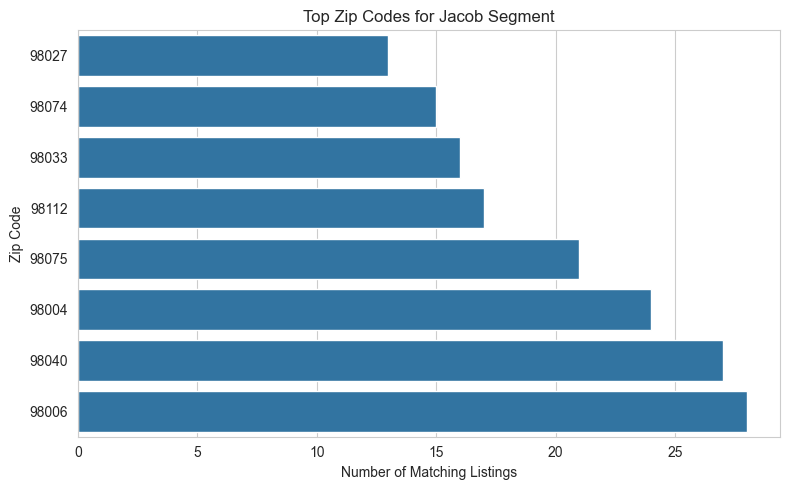

In [108]:
top_jacob = jacob_zip_price.head(8).reset_index()
top_jacob['zipcode'] = top_jacob['zipcode'].astype(str)

top_jacob = top_jacob.sort_values('listings', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(data=top_jacob, x='listings', y='zipcode')

plt.title("Top Zip Codes for Jacob Segment")
plt.xlabel("Number of Matching Listings")
plt.ylabel("Zip Code")

plt.tight_layout()
plt.show()

The distribution of matching listings shows a clear geographic concentration.

Zip codes 98006 and 98040 exhibit the highest availability of properties satisfying Jacob’s structural requirements, followed by 98004 and 98075.

This confirms that suitable large-lot, high-end properties are clustered within a limited number of premium submarkets rather than evenly distributed across the region.

#### Median Price by Zip Code (Jacob Segment)

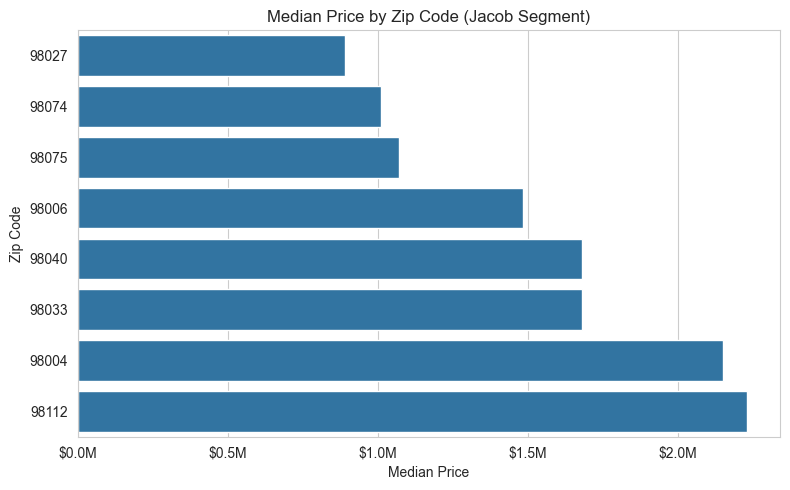

In [109]:
top_price = jacob_zip_price.head(8).reset_index()
top_price['zipcode'] = top_price['zipcode'].astype(str)

top_price = top_price.sort_values('median_price', ascending=True)

plt.figure(figsize=(8,5))
sns.barplot(data=top_price, x='median_price', y='zipcode')

plt.gca().xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M')
)

plt.title("Median Price by Zip Code (Jacob Segment)")
plt.xlabel("Median Price")
plt.ylabel("Zip Code")

plt.tight_layout()
plt.show()

Median pricing varies substantially across high-concentration zip codes.

While areas such as 98004 and 98112 represent the upper end of the luxury spectrum, zip codes like 98075 and 98027 offer comparatively lower median pricing within the premium bracket.

This indicates that Jacob can choose between ultra-premium positioning and relatively more price-efficient luxury zones without compromising his structural requirements.

#### Strategic Geographic Recommendation

Although several zip codes show high concentrations of matching properties, 
the choice depends on Jacob’s positioning strategy:

- For ultra-premium prestige positioning → 98004 / 98040
- For strong lot size and relative price efficiency → 98075 / 98006
- For balance between availability and value → 98033 / 98039

Overall, Jacob’s requirements are spatially aligned with established luxury clusters, 
confirming that both structural features and geography jointly drive premium pricing.

#### Buyer Feasibility Conclusion

Jacob’s requirements define an extremely selective segment (~1% of the market).

Most properties satisfying his criteria are priced within the luxury bracket, confirming that large interior space and large lot size structurally drive high-end pricing.

While Jacob prefers no waterfront, the majority of matching properties remain in premium geographic zones.

Overall, Jacob’s preferences are feasible within the market — but almost exclusively within the upper price distribution.

## Market vs Luxury vs Jacob Comparison

To understand whether Jacob represents a typical luxury buyer or a more extreme sub-segment, 
we compare three structural groups:

- Overall Market  
- Luxury Segment  
- Jacob’s Filtered Segment  

This comparison reveals whether Jacob’s preferences push him further into the premium tail of the distribution.

In [69]:
df['segment'] = 'Market'
df.loc[df['price'] >= 1160000, 'segment'] = 'Luxury'

jacob_df['segment'] = 'Jacob'

combined = pd.concat([
    df[['price','sqft_living','sqft_lot','grade','bathrooms','segment']],
    jacob_df[['price','sqft_living','sqft_lot','grade','bathrooms','segment']]
])

### Price Comparison

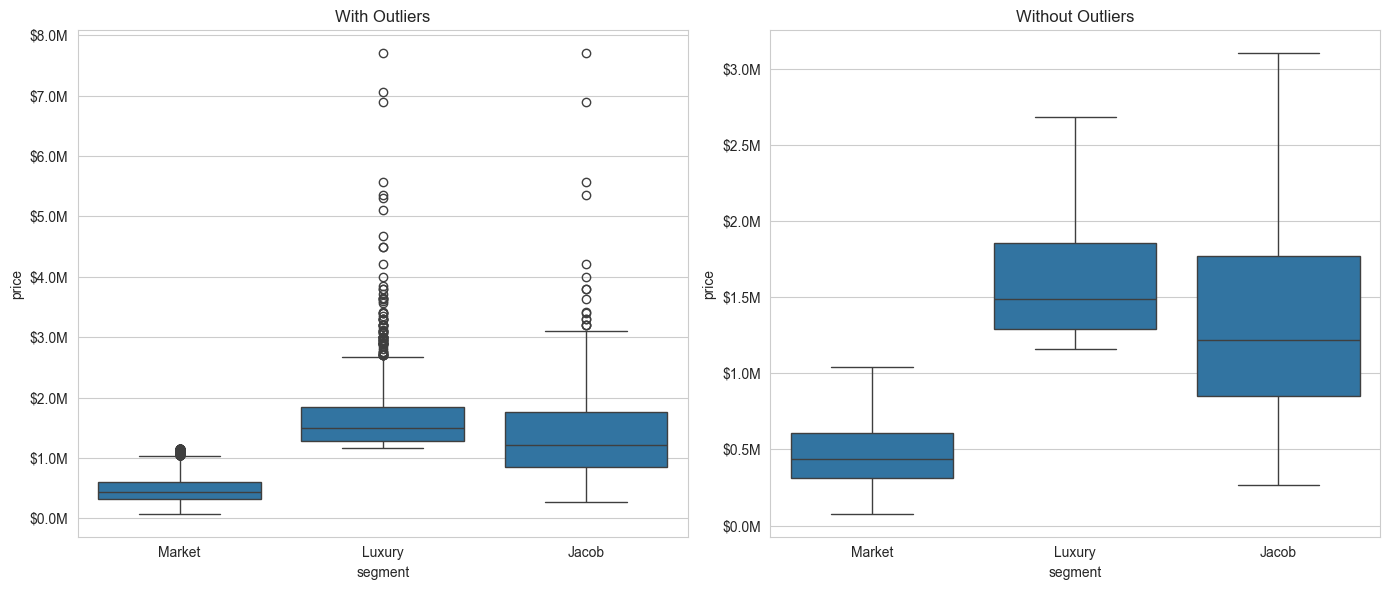

In [118]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# --- With outliers ---
sns.boxplot(
    x='segment',
    y='price',
    data=combined,
    showfliers=True,
    ax=axes[0]
)
axes[0].set_title("With Outliers")
axes[0].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M')
)

# --- Without outliers ---
sns.boxplot(
    x='segment',
    y='price',
    data=combined,
    showfliers=False,
    ax=axes[1]
)
axes[1].set_title("Without Outliers")
axes[1].yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M')
)

plt.tight_layout()
plt.show()

The dual visualization highlights both full price dispersion (left) and core structural differences (right).

The left panel illustrates the upper-tail behavior of the distribution, showing that both the luxury and Jacob segments contain extreme premium properties extending beyond $5M–$7M.  

The right panel suppresses outliers to emphasize median positioning and interquartile ranges, revealing clearer structural separation:

• The overall market median remains below $500K.  
• The luxury segment exhibits a median around $1.4–1.5M.  
• Jacob’s filtered segment is firmly positioned within the upper price distribution, with a median above $1.2M.

Although Jacob’s median price is slightly below the broader luxury median, his segment remains structurally concentrated within high-end pricing territory.

Overall, the comparison confirms that Jacob’s requirements naturally position him within the premium tier of the market rather than representing a distinct ultra-luxury outlier group.

### Living Area Comparison

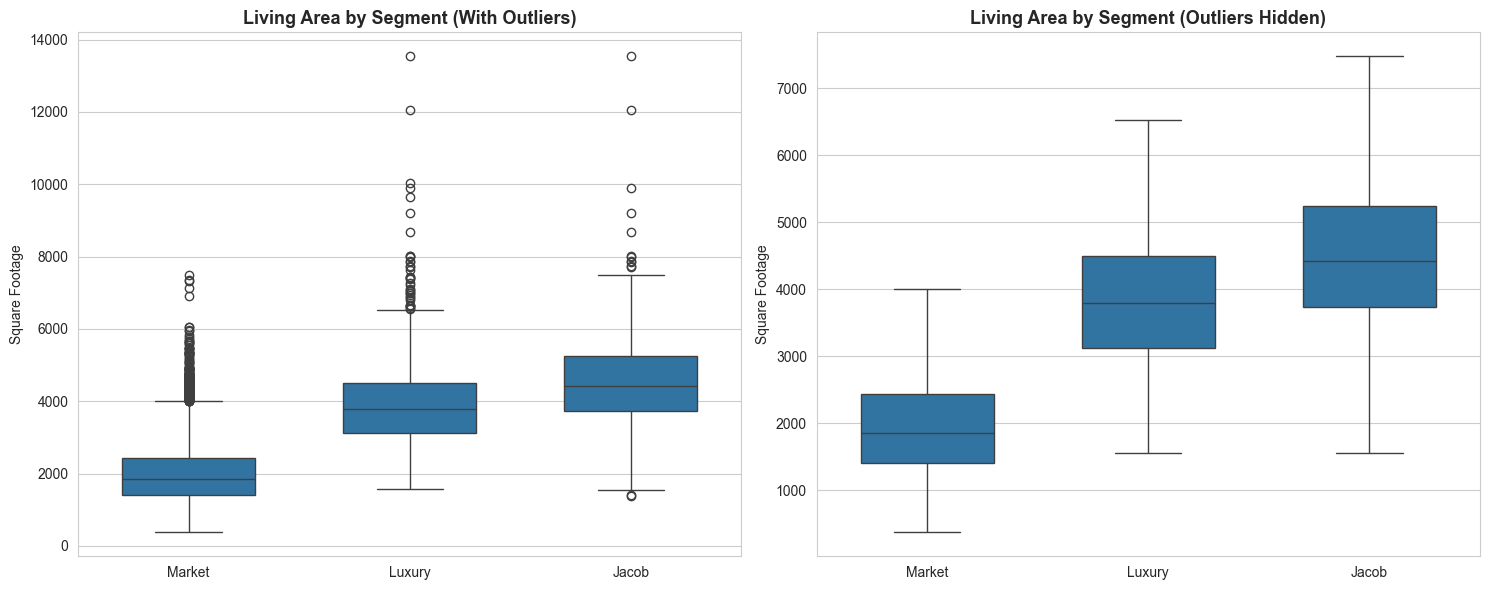

In [119]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# --- WITH outliers ---
sns.boxplot(
    x='segment',
    y='sqft_living',
    data=combined,
    showfliers=True,
    width=0.6,
    ax=axes[0]
)

axes[0].set_title("Living Area by Segment (With Outliers)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Square Footage")


# --- WITHOUT outliers ---
sns.boxplot(
    x='segment',
    y='sqft_living',
    data=combined,
    showfliers=False,
    width=0.6,
    ax=axes[1]
)

axes[1].set_title("Living Area by Segment (Outliers Hidden)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("Square Footage")

plt.tight_layout()
plt.show()

The dual visualization presents both full dispersion (left) and structural distribution (right).

The left panel highlights the upper tail of the distribution, showing that luxury and Jacob segments include exceptionally large properties exceeding 10,000–13,000 square feet.

The right panel hides extreme outliers to emphasize median positioning and interquartile ranges, revealing clear structural separation:

• The overall market median is below 2,000 sqft.  
• The luxury segment centers around 3,500–3,800 sqft.  
• Jacob’s filtered segment shifts further right, with a median above 4,000 sqft.

This confirms that interior space is one of the strongest structural drivers of premium pricing.

Jacob’s 4+ bathroom requirement inherently selects larger homes, reinforcing his alignment with the upper-tier housing segment.

### Bathrooms Comparison

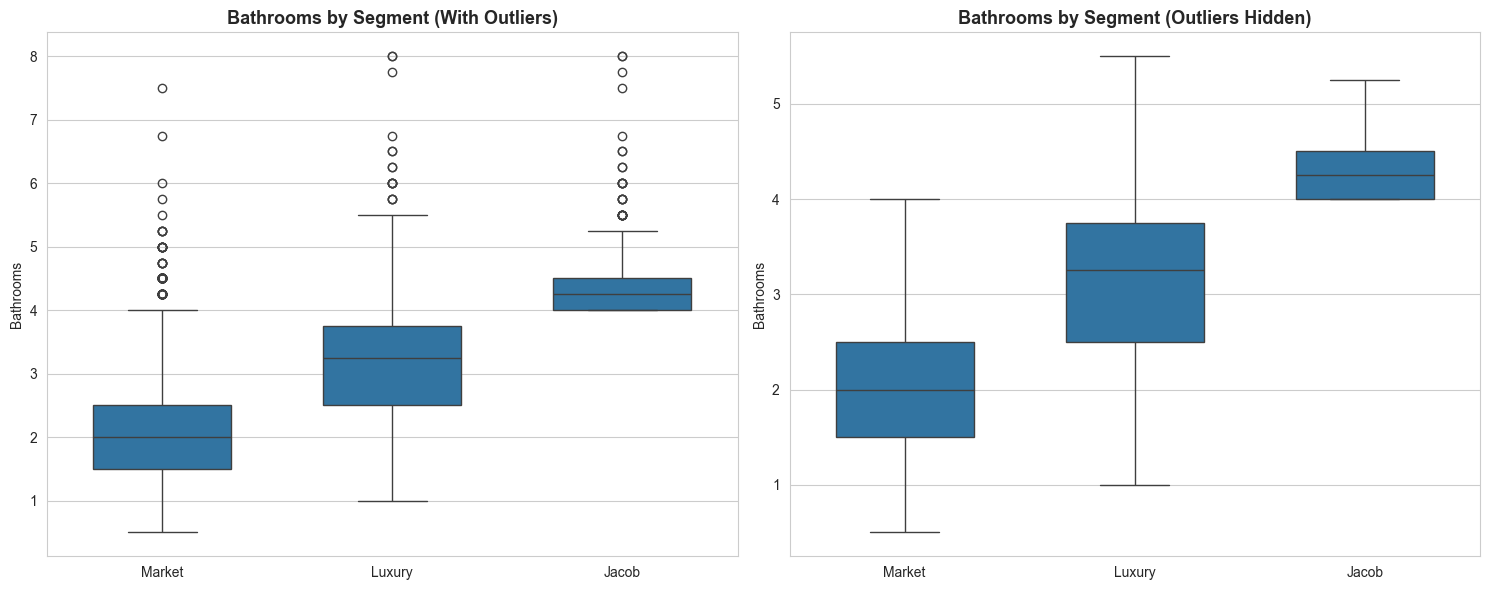

In [120]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# --- WITH outliers ---
sns.boxplot(
    x='segment',
    y='bathrooms',
    data=combined,
    showfliers=True,
    width=0.6,
    ax=axes[0]
)

axes[0].set_title("Bathrooms by Segment (With Outliers)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Bathrooms")


# --- WITHOUT outliers ---
sns.boxplot(
    x='segment',
    y='bathrooms',
    data=combined,
    showfliers=False,
    width=0.6,
    ax=axes[1]
)

axes[1].set_title("Bathrooms by Segment (Outliers Hidden)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("Bathrooms")

plt.tight_layout()
plt.show()

The dual visualization highlights both full dispersion (left) and structural differences (right).

The left panel illustrates the upper range of bathroom counts, showing that both luxury and Jacob segments include rare 6–8 bathroom properties.

The right panel suppresses extreme values to emphasize median positioning and interquartile ranges, revealing clear segmentation:

• The overall market centers around 2 bathrooms.  
• The luxury segment shifts upward to a median near 3 bathrooms.  
• Jacob’s filtered segment is structurally anchored above 4 bathrooms.

Bathroom count therefore acts as a strong structural discriminator between market tiers.

Jacob’s 4+ bathroom requirement effectively pushes his segment beyond the standard luxury baseline, positioning him within the upper premium subset of the market.

### Construction Grade Comparison

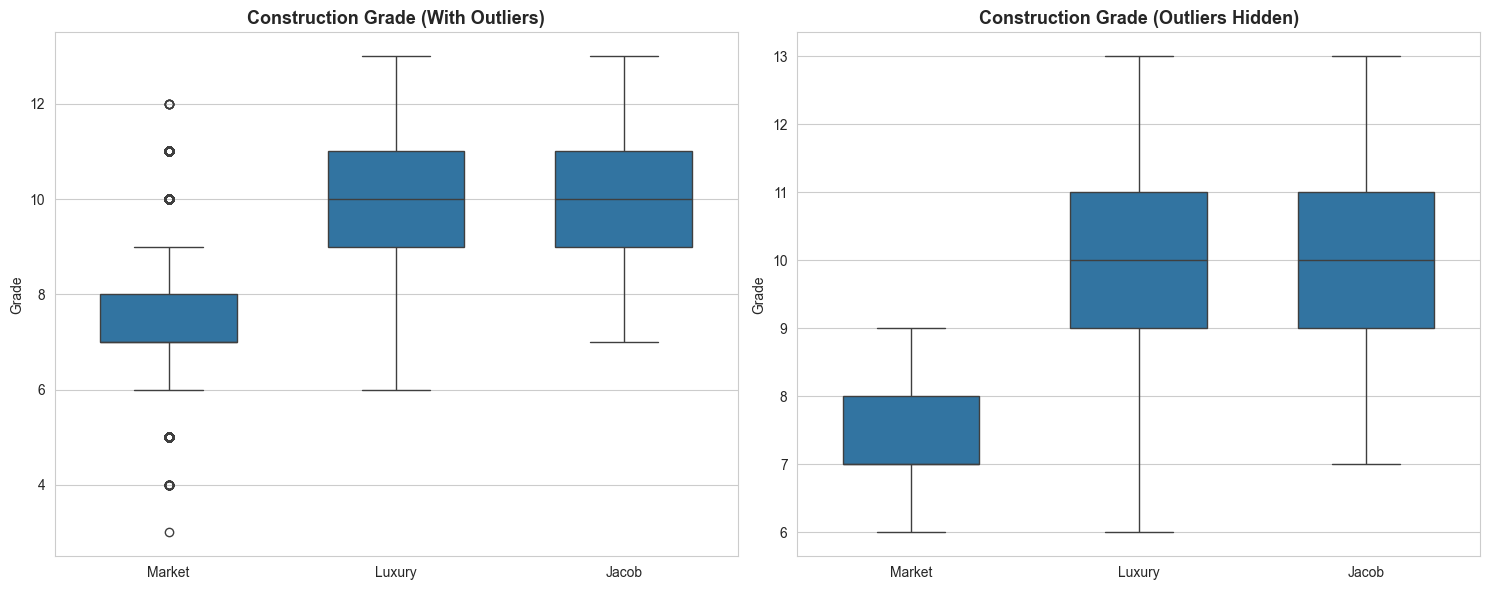

In [121]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(15,6))

# --- WITH outliers ---
sns.boxplot(
    x='segment',
    y='grade',
    data=combined,
    showfliers=True,
    width=0.6,
    ax=axes[0]
)

axes[0].set_title("Construction Grade (With Outliers)", fontsize=13, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Grade")


# --- WITHOUT outliers ---
sns.boxplot(
    x='segment',
    y='grade',
    data=combined,
    showfliers=False,
    width=0.6,
    ax=axes[1]
)

axes[1].set_title("Construction Grade (Outliers Hidden)", fontsize=13, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("Grade")

plt.tight_layout()
plt.show()

The dual visualization presents both full dispersion (left) and structural positioning (right).

The left panel shows the complete grade distribution, including rare lower-grade and ultra-high-grade properties across segments.

The right panel suppresses extreme values to clarify median alignment and interquartile ranges, revealing distinct structural separation:

• The overall market centers around grade 7.  
• The luxury segment shifts upward to a median near grade 10.  
• Jacob’s filtered segment closely mirrors the luxury grade profile.

Unlike living area and bathroom count, Jacob’s segment does not significantly exceed the broader luxury baseline in construction quality.  

This indicates that grade functions as a baseline premium requirement rather than an extreme differentiator within Jacob’s profile.

Overall, construction quality strongly separates the overall market from the premium tiers, but Jacob aligns structurally with the established luxury segment rather than representing a higher-quality outlier subset.

### Segment Positioning Summary

The cross-segment comparison across price, living area, bathrooms, and construction grade reveals clear structural differentiation:

• Luxury properties are consistently larger, higher quality, and significantly more expensive than the overall market.  
• Jacob’s filtered profile does not merely align with luxury — it represents a structurally intensified subset within it.  
• His combined constraints (4+ bathrooms, large lot, no waterfront) systematically shift his feasible options toward the upper tail of the premium distribution.

Importantly, Jacob does not behave as an ultra-luxury outlier, but rather as a highly selective premium buyer operating within established high-end clusters.

Overall, his requirements structurally embed him within the upper-tier housing market rather than the broader market baseline.

# Executive Conclusion

The analysis confirms strong structural segmentation within the housing market.

Key insights include:

1. Price, living area, and construction grade clearly separate the overall market from the luxury tier.  
2. Luxury homes are structurally larger, higher quality, and geographically concentrated in specific premium zip codes.  
3. Jacob’s requirements (4+ bathrooms, large lot, no waterfront) systematically push him into the upper-tier housing distribution.  

Importantly, Jacob does not represent an ultra-luxury anomaly, but rather a highly selective premium buyer whose constraints naturally align with established luxury clusters.

---

# Client Recommendations (Jacob – Buyer Perspective)

Based on the analysis, we recommend:

1. Focus search efforts within zip codes 98004, 98040, and 98112, where structural alignment with Jacob’s preferences is strongest.

2. Prioritize properties with higher living area and construction grade over marginal bathroom increases, as size and quality drive price positioning more consistently.

3. Consider price-efficient premium zones (e.g., 98075, 98006) to balance structural fit with relative value per square foot.

Overall, Jacob’s preferences are feasible within the market — but almost exclusively within the premium segment. Strategic geographic targeting will significantly increase search efficiency.